# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd                # pandas is a dataframe library
import matplotlib.pyplot as plt    # matplotlib.pyplot plots data|
import numpy as np                 # numpy provides N-dim object support

# do plotting inline instead of in a separate window
%matplotlib inline

## Load and review data

In [2]:
df = pd.read_csv("./data/pima-data.csv")       # load Pima data. Adjust path as necessary

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features

From the metadata on the data source, we have the following definition of the features. 

| Feature      | Description                                                              | Comments   |
|--------------|--------------------------------------------------------------------------|------------|
| num_preg     | number of pregnancies                                                    | 0 is valid |
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| diastolic_bp | Diastolic blood pressue (mm Hg)                                          |
| thickness    | Triceps skin fold thickness (mm)                                         |
| insulin      | 2-Hour serum insulin (mm U/ml)                                           |
| bmi          | Body mass index (weight in kg/(height in m)^2)                           |
| dia_pred     | Diabetes pedigree function                                               |
| Age(years)   | Age(years)                                                               |
| skin         | ???                                                                      | What is this?
| diabetes     | Class variable (1=True, 0=False)                                         | Why is the data boolean (T/F)?


## Check for null values

In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size = 11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe. 
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot (default is 11)
        
        Displays:
            matrix of correlation between columns
            
            green-lavender-orange-blue-pink-brown-gray  ==>  Less correlation to more correlation
            0 -------------------------------------> 1
            
            Expect a gray line funning from the top-left to the bottom-right
    """
    
    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr, cmap ="Accent")    # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)   # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)   # draw y tick marks

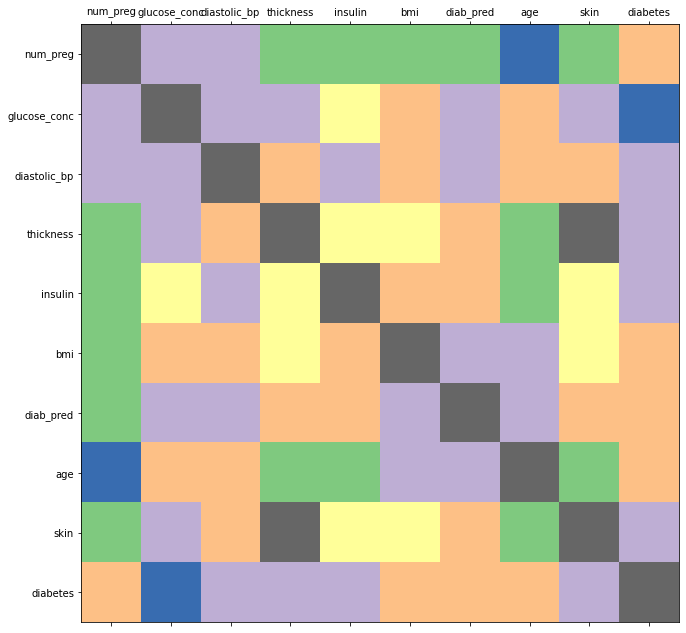

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
del df['skin']

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


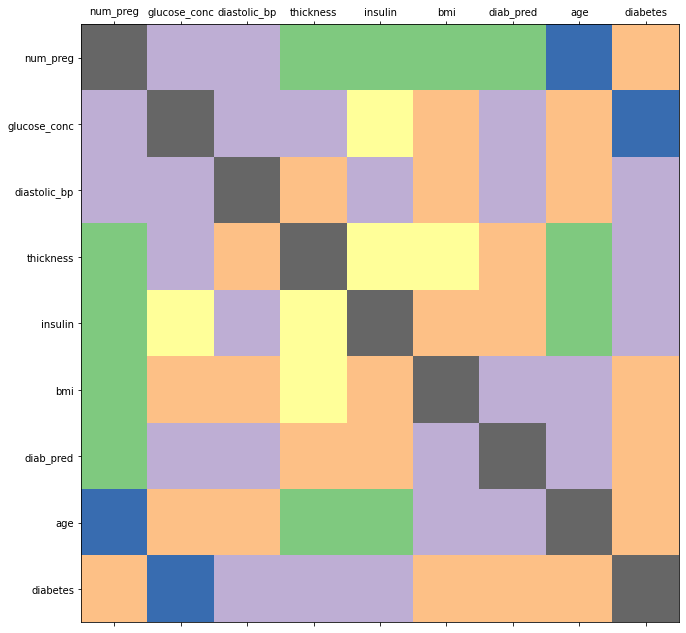

In [13]:
plot_corr(df)

## Check Data Types

In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1, False to 0

In [15]:
diabetes_map = {True: 1, False: 0}

In [16]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [17]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

In [18]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false)) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)



Good distribution of true and false cases. No special work needed.

### Spliting the data

70% for training, 30% for testing

In [19]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values     # predictor feature columns (8 x m)
y = df[predicted_class_names].values # predicted class (1 = true, 0 = false) column (1 x m)
split_test_size = 0.30

# test_size = 0.30 is 30%, 42 is the answer to everything
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)


We check to ensure we have the desired 70% train, 30% test split of the data. 

In [20]:
print("{0:0.2f}% in training set".format((len(X_train) / len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index)) * 100))

69.92% in training set
30.08% in test set


#### Verifying predicted value was split correctly

In [21]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-Split Data Preparation

#### Hidden Missing Values

In [22]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?

How many rows have unexpected 0 values?

In [23]:
print("# of rows in dataframe: {0}".format(len(df)))
print("# of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# of rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# of rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# of rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# of rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# of rows in dataframe: 768
# of rows missing glucose_conc: 5
# of rows missing diastolic_bp: 35
# of rows missing thickness: 227
# of rows missing insulin: 374
# of rows missing bmi: 11
# of rows missing diab_pred: 0
# of rows missing age: 0


#### Impute with the mean

In [24]:
from sklearn.impute import SimpleImputer

# Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values = 0, strategy = "mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naïve Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

### Performance on Training Data

In [28]:
# predict values using training data
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



In [31]:
# predict values using training data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7359



#### Metrics

In [32]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))


Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

### Predict Training Data

In [35]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


### Predict Test Data

In [36]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7100


In [37]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[121  30]
 [ 37  43]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



 ## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel()) 
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



Setting regularization hyperparameter

1st max value of 0.613 occured at C=1.300


Text(0, 0.5, 'recall score')

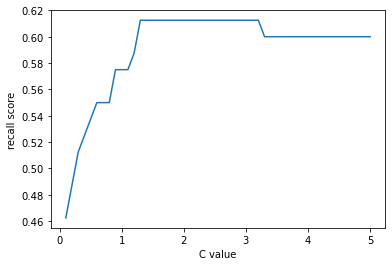

In [40]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel()) 
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

### Logistic Regression with class_weight="balanced"

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

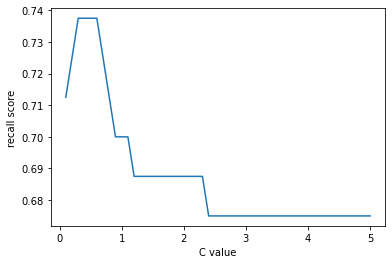

In [42]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel()) 
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [44]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


### Logistic RegressionCV

In [46]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=500,
                     n_jobs=-1, random_state=42, refit=False)

### Predict on Test Data

In [47]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7013
[[109  42]
 [ 27  53]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



## Using your Trained Data